In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Smokers vs non smokers insurance charges
1. Smokers and non smokers have the same amount of insurance charges.
There is a significant difference between smokers and non smokers insurance charges.
2. This would be a continious nominal data type

In [3]:
#3.
#sample = df.sample(n=,random_state=42)
smoker = df.loc[ df['smoker']=='yes', "charges"]
non_smoker = df.loc[ df['smoker']=='no',"charges"]

In [4]:
print(f"For smokers(n={len(smoker)}): Mean={np.mean(smoker):.2f}")
print(f"For non smokers(n={len(non_smoker)}): Mean={np.mean(non_smoker):.2f}")

For smokers(n=274): Mean=32050.23
For non smokers(n=1064): Mean=8434.27


In [5]:
smoker_outliers = np.abs(stats.zscore(smoker)) > 3
smoker_outliers.sum()


0

In [6]:
non_smoker_outliers = np.abs(stats.zscore(non_smoker)) > 3
non_smoker_outliers.sum()

24

In [7]:
result = stats.normaltest(non_smoker)
result.pvalue

1.9193129759002216e-69

In [8]:
result = stats.normaltest(smoker)
result.pvalue

5.564930630036463e-14

In [9]:
result = stats.levene(non_smoker, smoker)
print(result)

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)


In [10]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


In [11]:
result = stats.ttest_ind(smoker, non_smoker, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)


True

In [12]:
smoker.mean()

32050.23183153284

In [13]:
non_smoker.mean()

8434.268297856204

4. Since we reject the null hyptohesis cause both p-values are greater than alpha(.05) we can come to the conclusion that smokers have a higher insurance charge than non smokers.

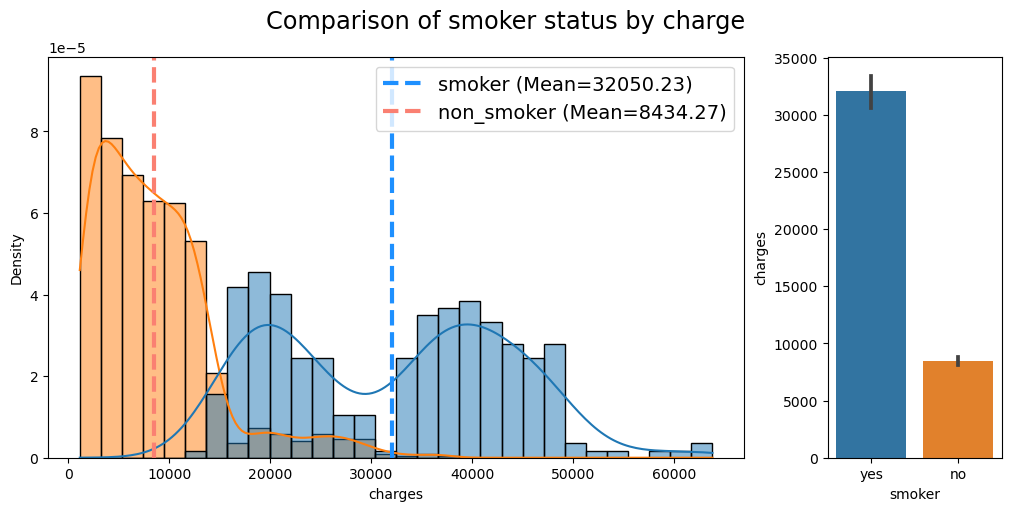

In [14]:
#5.
smoker_palette={'smoker':'dodgerblue', 'non_smoker':'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges', hue = 'smoker',fill=True,kde=True,
                  stat='density',common_norm=False,ax=ax)
                

ax.axvline(np.mean(smoker), ls='--',lw=3, 
           label=f"smoker (Mean={np.mean(smoker):.2f})",color=smoker_palette['smoker'])

ax.axvline(np.mean(non_smoker), ls='--', lw=3, 
           label=f"non_smoker (Mean={np.mean(non_smoker):.2f})",color=smoker_palette['non_smoker'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar)
fig.suptitle('Comparison of smoker status by charge',fontsize='xx-large');

1.Null hypothesis: Men and women have equal likelihood of being smokers.Non-null hypothesis: There is a difference between likelihood of men being smokers compared to women being smokers.
2.This would be a discrete categorical data type.


In [15]:
df['smoker']= df['smoker'].replace({'no':0, 'yes':1})

In [16]:
#sample = df.sample(n=df,random_state=42)
male_smoker = df.loc[ df['sex']=='male', "smoker"]
female_smoker = df.loc[ df['sex']=='female',"smoker"]

In [17]:
male_smoker.value_counts()

0    517
1    159
Name: smoker, dtype: int64

In [18]:
female_smoker.value_counts()

0    547
1    115
Name: smoker, dtype: int64

In [19]:
print(f"For male smokers(n={len(male_smoker)}): Mean={np.mean(male_smoker):.2f}")
print(f"For female smokers(n={len(female_smoker)}): Mean={np.mean(female_smoker):.2f}")

For male smokers(n=676): Mean=0.24
For female smokers(n=662): Mean=0.17


In [20]:
male_outliers = np.abs(stats.zscore(male_smoker)) > 3
male_outliers.sum()


0

In [21]:
female_outliers = np.abs(stats.zscore(female_smoker)) > 3
female_outliers.sum()


0

In [22]:
result = stats.normaltest(male_smoker)
result.pvalue

2.9790348129116147e-27

In [23]:
result = stats.normaltest(female_smoker)
result.pvalue

1.5451615879700298e-40

In [24]:
result = stats.levene(male_smoker, female_smoker)
print(result)

LeveneResult(statistic=7.799582538314033, pvalue=0.005300369127378653)


In [25]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


In [26]:
result = stats.ttest_ind(male_smoker, female_smoker, equal_var=True)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=2.7927732701230927, pvalue=0.005300369127374036)


True

In [27]:
male_smoker.mean()

0.23520710059171598

In [28]:
female_smoker.mean()

0.17371601208459214

4. Since we reject the null hypothesis cause both male and female smoker values are greater than alpha(.05) we can come to the conclusion since the mean of the male smokers is higher than the female we can also conclude that males have a higher chance of being smokers.

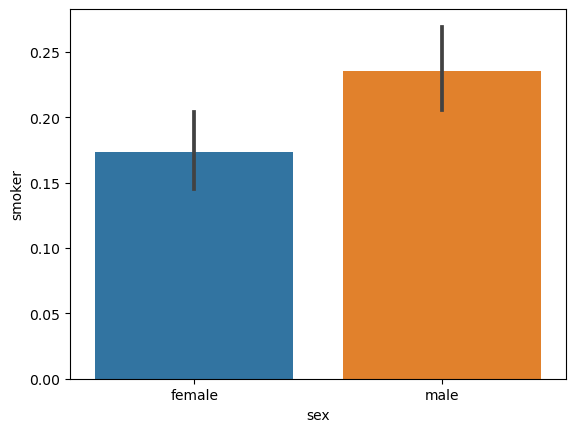

In [29]:
#5.
gender_palette={'male_smoker':'dodgerblue', 'female_smoker':'salmon'}
## Visualizing Sample means
#fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                #constrained_layout=True,
                                #gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
#ax = sns.histplot(data=df, x='sex', hue = 'smoker',fill=True,kde=True,
                  #stat='density',common_norm=False,ax=ax,)

#ax.axvline(np.mean(male_smoker), ls='--',lw=3, 
           #label=f"male_smoker (Mean={np.mean(male_smoker):.2f})")

#ax.axvline(np.mean(female_smoker), ls='-', lw=3, 
           #label=f"female_smoker (Mean={np.mean(female_smoker):.2f})")

#ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='sex',y='smoker')
fig.suptitle('Comparison of smoker status by sex',fontsize='xx-large');

1. Null hypothesis: Different regions do not have different variance of charges. Non-null hypothesis: Different regions do have a variance of charges
2. This is a continous nominal data type

In [30]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [31]:
#3.
#sample = df.sample(n=50,random_state=42)
southeast = df.loc[ df['region']=='southeast', "charges"]
southwest = df.loc[ df['region']=='southwest',"charges"]
northwest = df.loc[ df['region']=='northwest',"charges"]
northeast = df.loc[ df['region']=='northeast',"charges"]

In [32]:
southeast_outliers = np.abs(stats.zscore(southeast)) > 3
southeast_outliers.sum()

2

In [33]:
southwest_outliers = np.abs(stats.zscore(southwest)) > 3
southwest_outliers.sum()

8

In [34]:
northeast_outliers = np.abs(stats.zscore(northeast)) > 3
northeast_outliers.sum()

4

In [35]:
northwest_outliers = np.abs(stats.zscore(northwest)) > 3
northwest_outliers.sum()

7

In [36]:
southeast= southeast[~southeast_outliers]

In [37]:
len(southeast), len(southwest),len(northwest),len(northeast)

(362, 325, 325, 324)

In [38]:
southwest = southwest[~southwest_outliers]

In [39]:
northeast= northeast[~northeast_outliers]

In [40]:
northwest= northwest[~northwest_outliers]

In [41]:
result = stats.normaltest(southeast)
result.pvalue

1.9369900501741734e-13

In [42]:
result = stats.normaltest(southwest)
result.pvalue

7.728611243124505e-22

In [43]:
northeast.value_counts()

6406.410700     1
2721.320800     1
4661.286350     1
8688.858850     1
19798.054550    1
               ..
3167.455850     1
7323.734819     1
6555.070350     1
2727.395100     1
2205.980800     1
Name: charges, Length: 320, dtype: int64

In [44]:
result = stats.normaltest(northeast)
result.pvalue

3.5578767155624347e-17

# Since all the pvalues are less than alpha we can come to the conclusion that the region doesnt have a significant effect on the insurance charges.

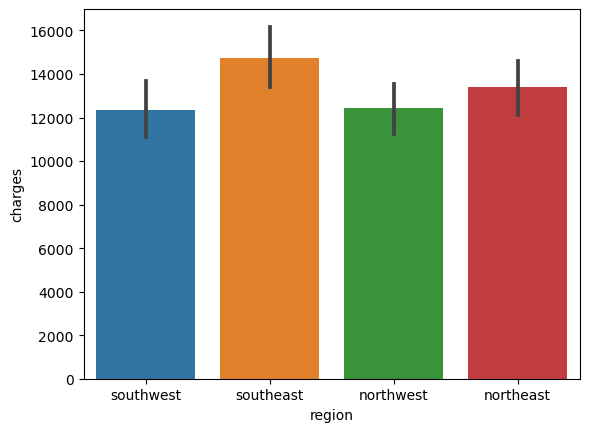

In [45]:
sns.barplot(data=df, x='region',y='charges')
fig.suptitle('Comparison of charges based on region',fontsize='xx-large');